In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering

In [59]:
data = pd.read_csv('diabetes.csv')

In [60]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
x= data[['BloodPressure','Age']]

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

**Let's Start with the Random Values of the n_clusters**

In [63]:
k_means = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [64]:
k_means.cluster_centers_

array([[ 0.50487508,  1.22898725],
       [ 0.01992063, -0.58687807],
       [-3.458318  , -0.24217239]])

In [65]:
k_means.n_clusters

3

In [66]:
y_labels=k_means.fit_predict(X)
y_labels

array([0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2,

In [67]:
k_means.inertia_

485.2351383329126

In [68]:
sns.set_style('whitegrid')

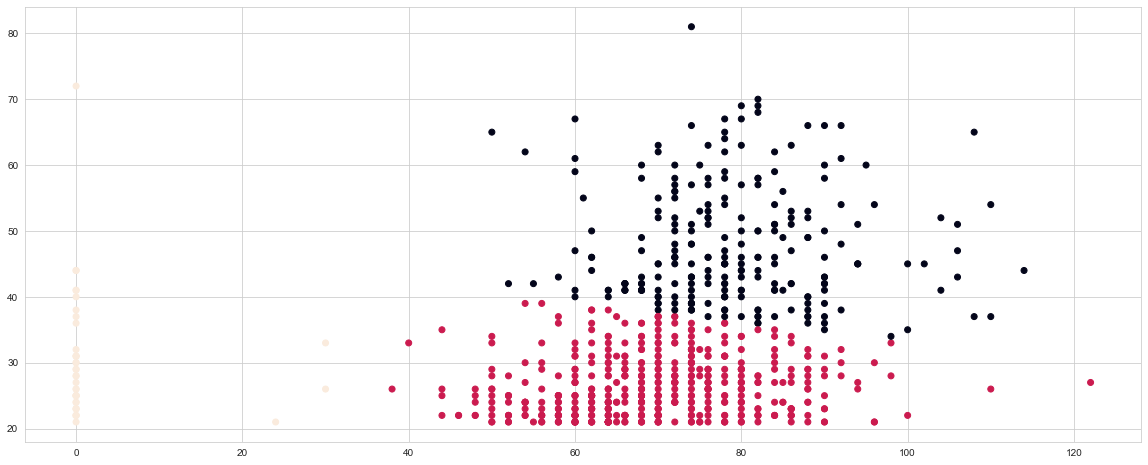

In [69]:
plt.figure(figsize=(20,8))
plt.scatter(data['BloodPressure'],data['Age'],c=y_labels)
plt.show()

**Let's Select the K_values where we can get the minimum values of the MSE**

In [70]:
MSE=[]


for i in range(1,30):
    
    k_means = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=42)
    k_means.fit(X)
    k_ineria= k_means.inertia_
    MSE.append(k_ineria) 

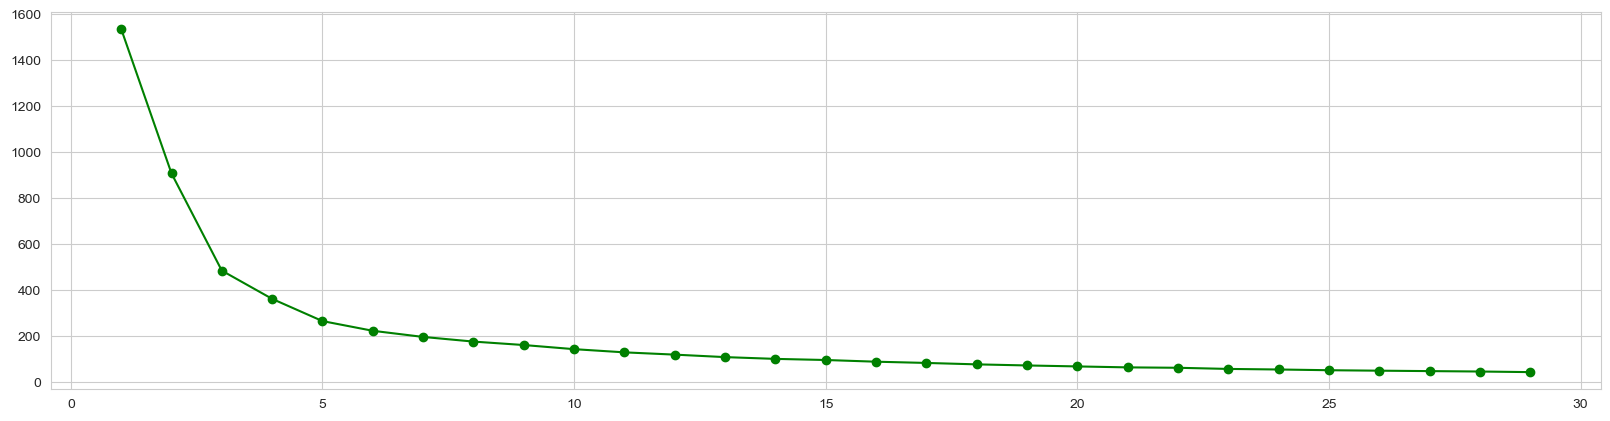

In [71]:
plt.figure(figsize=(20,5),dpi=100)
plt.plot(range(1,30),MSE,color='g',marker='o')
plt.show()

In [72]:
k_means = KMeans(n_clusters=5,init='k-means++',max_iter=300,random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [73]:
k_ineria=k_means.cluster_centers_
k_ineria

array([[ 0.56878165,  2.03258874],
       [-0.39002851, -0.71288987],
       [-3.458318  , -0.24217239],
       [ 0.62312649, -0.5683895 ],
       [ 0.33836533,  0.61491698]])

In [74]:
y_labels=k_means.fit_predict(X)
y_labels

array([0, 1, 1, 1, 1, 3, 1, 2, 0, 0, 3, 4, 0, 0, 0, 2, 3, 3, 2, 3, 3, 0,
       4, 3, 0, 4, 4, 1, 0, 4, 0, 3, 1, 3, 4, 1, 4, 4, 1, 0, 1, 4, 0, 0,
       4, 1, 1, 1, 1, 2, 3, 1, 1, 0, 4, 1, 4, 3, 4, 1, 2, 4, 4, 1, 4, 3,
       4, 0, 1, 3, 1, 1, 4, 3, 3, 1, 4, 3, 2, 1, 1, 2, 4, 1, 3, 3, 4, 1,
       4, 1, 1, 4, 4, 0, 3, 4, 1, 1, 1, 3, 4, 1, 3, 3, 1, 1, 3, 4, 1, 3,
       3, 4, 3, 1, 4, 0, 4, 1, 1, 3, 3, 1, 3, 0, 3, 2, 1, 1, 4, 0, 4, 1,
       1, 4, 1, 1, 1, 1, 3, 3, 0, 4, 1, 4, 1, 3, 4, 1, 0, 1, 3, 4, 4, 3,
       4, 4, 1, 1, 3, 4, 4, 4, 3, 1, 3, 4, 1, 4, 1, 3, 4, 1, 2, 1, 1, 4,
       4, 3, 4, 4, 3, 1, 3, 1, 4, 4, 0, 3, 3, 3, 1, 4, 4, 2, 4, 3, 1, 1,
       1, 1, 3, 3, 1, 1, 0, 3, 0, 0, 1, 4, 1, 3, 0, 1, 4, 4, 1, 1, 3, 4,
       1, 0, 2, 0, 1, 3, 3, 1, 1, 3, 3, 4, 3, 1, 1, 3, 0, 3, 3, 3, 1, 1,
       1, 1, 3, 0, 4, 3, 4, 3, 4, 3, 3, 1, 4, 1, 1, 1, 1, 0, 4, 2, 1, 0,
       4, 4, 2, 1, 1, 2, 4, 1, 4, 3, 0, 1, 1, 1, 0, 1, 1, 4, 4, 4, 0, 0,
       3, 3, 1, 4, 3, 1, 3, 1, 0, 1, 1, 3, 4, 0, 2,

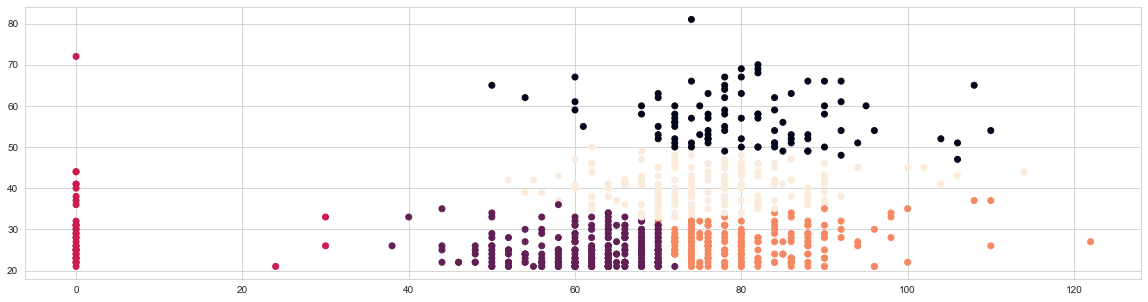

In [75]:
plt.figure(figsize=(20,5))
plt.scatter(data['BloodPressure'],data['Age'],c=y_labels,)
plt.show()

In [76]:
from sklearn.metrics import silhouette_score

In [78]:
score = silhouette_score(X,labels=y_labels)
score

0.4133888965232538

**Since,It is good clustered example beacause the value of the score is ranging from -1 to 1.Here we have got the possitive value of the silhousette score that's means our clustering is goog enough.**